In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
 
import statsmodels.datasets.co2 as co2

In [26]:
co2_raw = co2.load().data
co2_raw

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [40]:
df = co2_raw.reset_index()
df.columns=['ds', 'y']
df

,ds,y
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4
...,...,...
2279,2001-12-01,370.3
2280,2001-12-08,370.8
2281,2001-12-15,371.2
2282,2001-12-22,371.3


In [41]:
m = Prophet()
m.fit(df)

18:51:30 - cmdstanpy - INFO - Chain [1] start processing
18:51:30 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
future = m.make_future_dataframe(periods=365 * 4 + 3)
future.tail()

,ds
3683,2005-12-27
3684,2005-12-28
3685,2005-12-29
3686,2005-12-30
3687,2005-12-31


In [47]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3683,2005-12-27,378.676363,375.986627,381.362607
3684,2005-12-28,378.714991,376.054808,381.289913
3685,2005-12-29,378.753274,375.871146,381.454020
3686,2005-12-30,378.791105,376.063096,381.498046
3687,2005-12-31,378.828379,376.117850,381.453777


/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


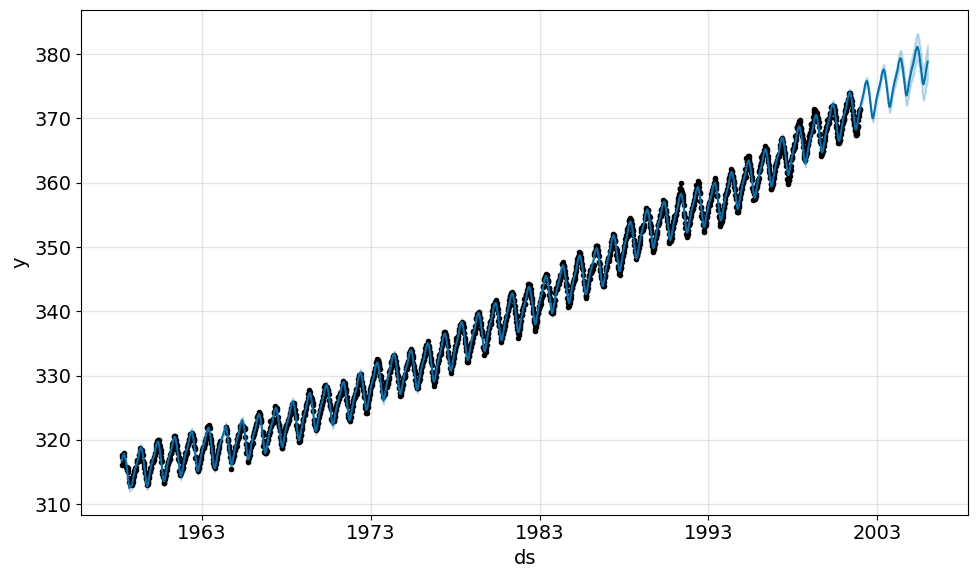

In [48]:
fig1 = m.plot(forecast)
plt.savefig('trend_analysis_11/fig-001.png')

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

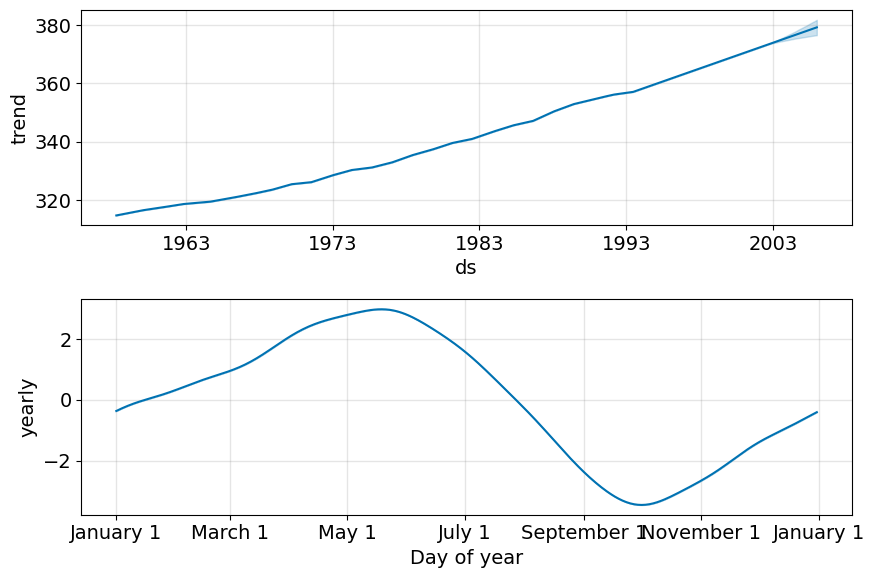

In [49]:
fig2 = m.plot_components(forecast)
plt.savefig('trend_analysis_11/fig-002.png')